In [6]:
import pandas as pd

df_gdp = pd.read_csv("world_country_gdp_usd.csv")

df_gdp

,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,2.129059e+10,162.726326
2,Afghanistan,AFG,1960,5.377778e+08,59.773234
3,Africa Western and Central,AFW,1960,1.040414e+10,107.930722
4,Angola,AGO,1960,NaN,NaN
...,...,...,...,...,...
16487,Kosovo,XKX,2021,9.007159e+09,4986.582469
16488,"Yemen, Rep.",YEM,2021,2.106169e+10,690.759273
16489,South Africa,ZAF,2021,4.199460e+11,6994.211654
16490,Zambia,ZMB,2021,2.120306e+10,1120.630171


In [4]:
df_life = pd.read_csv("Life-Expectancy-Data-Updated.csv")

df_life

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [9]:
df_gdp = df_gdp.rename(columns={"Country Name": "Country"})
df_gdp = df_gdp.rename(columns={"year": "Year"})

df_gdp

,Country,Country Code,Year,GDP_USD,GDP_per_capita_USD
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,2.129059e+10,162.726326
2,Afghanistan,AFG,1960,5.377778e+08,59.773234
3,Africa Western and Central,AFW,1960,1.040414e+10,107.930722
4,Angola,AGO,1960,NaN,NaN
...,...,...,...,...,...
16487,Kosovo,XKX,2021,9.007159e+09,4986.582469
16488,"Yemen, Rep.",YEM,2021,2.106169e+10,690.759273
16489,South Africa,ZAF,2021,4.199460e+11,6994.211654
16490,Zambia,ZMB,2021,2.120306e+10,1120.630171


In [14]:
df_gpd_life = pd.merge(df_gdp, df_life, on=["Country", "Year"], how="left")
cleaned_df = df_gpd_life.dropna(subset=["GDP_per_capita_USD", "Life_expectancy"])
#df_gpd_life
cleaned_df = cleaned_df[["Country", "Year", "GDP_per_capita_USD", "Life_expectancy"]]
cleaned_df

,Country,Year,GDP_per_capita_USD,Life_expectancy
10644,Angola,2000,556.836182,46.5
10645,Albania,2000,1126.683340,74.0
10648,United Arab Emirates,2000,33291.366250,74.3
10649,Argentina,2000,7708.099115,73.6
10650,Armenia,2000,622.740923,71.4
...,...,...,...,...
14890,Samoa,2015,4073.729083,72.7
14892,"Yemen, Rep.",2015,1601.807163,66.1
14893,South Africa,2015,6259.839681,62.6
14894,Zambia,2015,1338.290927,61.7


In [16]:
grouped_df = cleaned_df.groupby(["Country"])[["GDP_per_capita_USD", "Life_expectancy"]].mean()

sorted_df = grouped_df.sort_values(by="Life_expectancy", ascending=False)

sorted_df

,GDP_per_capita_USD,Life_expectancy
Country,,
Japan,39253.707361,82.45625
Switzerland,66934.937654,81.67500
Iceland,47282.714878,81.57500
Italy,32161.912328,81.38750
Australia,43065.770761,81.11250
...,...,...
Zimbabwe,797.774207,48.66250
Sierra Leone,397.849601,46.70000
Eswatini,3172.328746,46.69375


C:\Users\matti\AppData\Local\Temp\ipykernel_16056\3480811153.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,


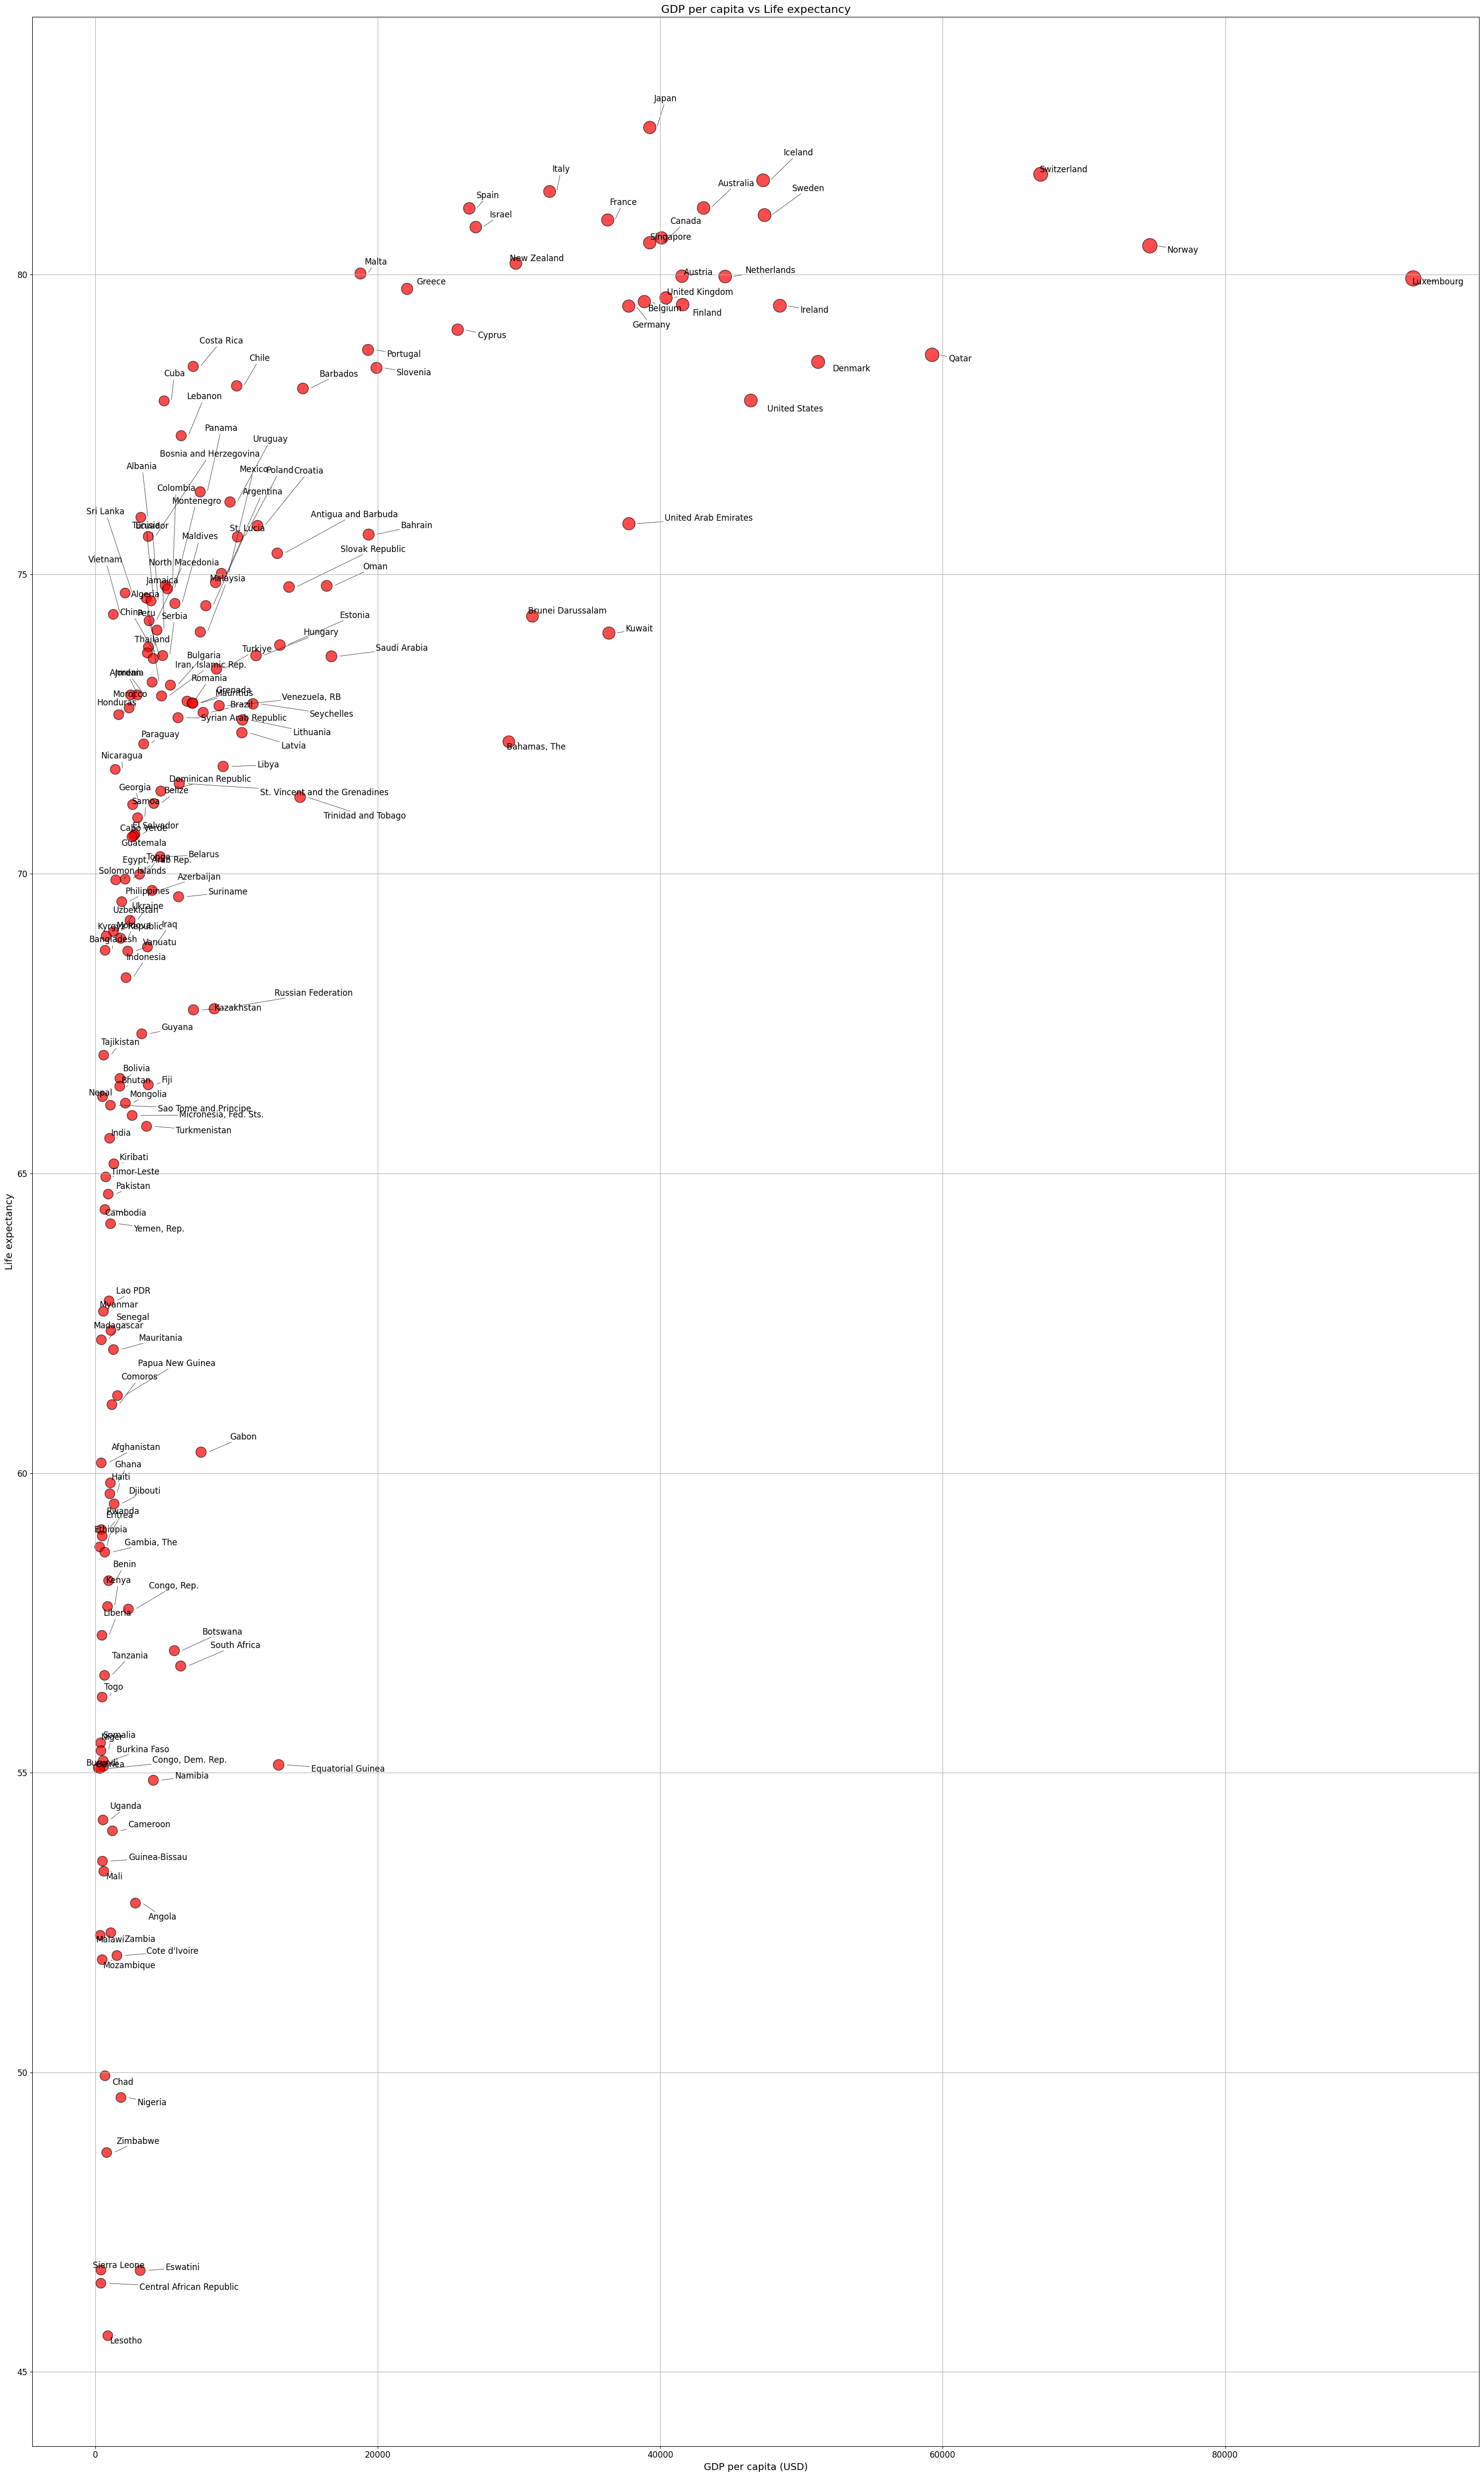

In [49]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Scale the dot size based on GDP per capita
min_dot_size = 200
max_dot_size = 500
dot_size = min_dot_size + (max_dot_size - min_dot_size) * (sorted_df['GDP_per_capita_USD'] / sorted_df['GDP_per_capita_USD'].max())

# Plotting
plt.figure(figsize=(30, 50))  # Adjusted figure size

scatter = plt.scatter(sorted_df['GDP_per_capita_USD'], sorted_df['Life_expectancy'], s=dot_size, c='red', edgecolors="black", alpha=0.7)

texts = []
for i, country in enumerate(sorted_df.index):
    # Adjust label position
    texts.append(plt.text(sorted_df['GDP_per_capita_USD'][i] + 500, sorted_df['Life_expectancy'][i], country,
                          fontsize=12, ha='left', va='center'))  # Adjusted label position

# Adjust label positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.title('GDP per capita vs Life expectancy', fontsize=16)
plt.xlabel('GDP per capita (USD)', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()